# Исследование объявлений о продаже квартир

**Дано:** данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Задача:** определить рыночную стоимость квартир, в частности установить параметры рыночной стоимости квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**План исследования:**

1. Обзор данных.
2. Предобработка данных (поиск и замена пропущенных значений, аномалий, дубликатов).
3. Исследовательский анализ данных.
4. Проверка гипотез.

In [1]:
from IPython.display import display, Markdown

def generate_simple_toc():
    toc = """
# Содержание

- [Обзор данных](#Обзор-данных)
- [Предобработка данных](#Предобработка-данных)
- [Создание новых признаков](#Создание-новых-признаков)
- [Исследовательский анализ данных](#Исследовательский-анализ-данных)
- [Итоги исследования](#Итоги-исследования)

"""
    display(Markdown(toc))

generate_simple_toc()


# Содержание

- [Обзор данных](#Обзор-данных)
- [Предобработка данных](#Предобработка-данных)
- [Создание новых признаков](#Создание-новых-признаков)
- [Исследовательский анализ данных](#Исследовательский-анализ-данных)
- [Итоги исследования](#Итоги-исследования)



### Обзор данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None) #установим максимальное количество колонок для отображения

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#изучим общую информацию о полученном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что датасет содержит 23699 строк и 22 столбца.\
Есть пропуски.

Неверный тип данных:
- first_day_exposition - должен быть тип datetime,
- floors_total - должен быть тип int,
- is_apartment - должен быть тип bool,
- parks_around3000 - должен быть тип int,
- ponds_around3000 - должен быть тип int,
- balcony - должен быть тип int,
- days_exposition - должен быть тип int.                                                      

Построим гисторгаммы для всех числовых значений, чтобы получить общую информацию о распределении данных.

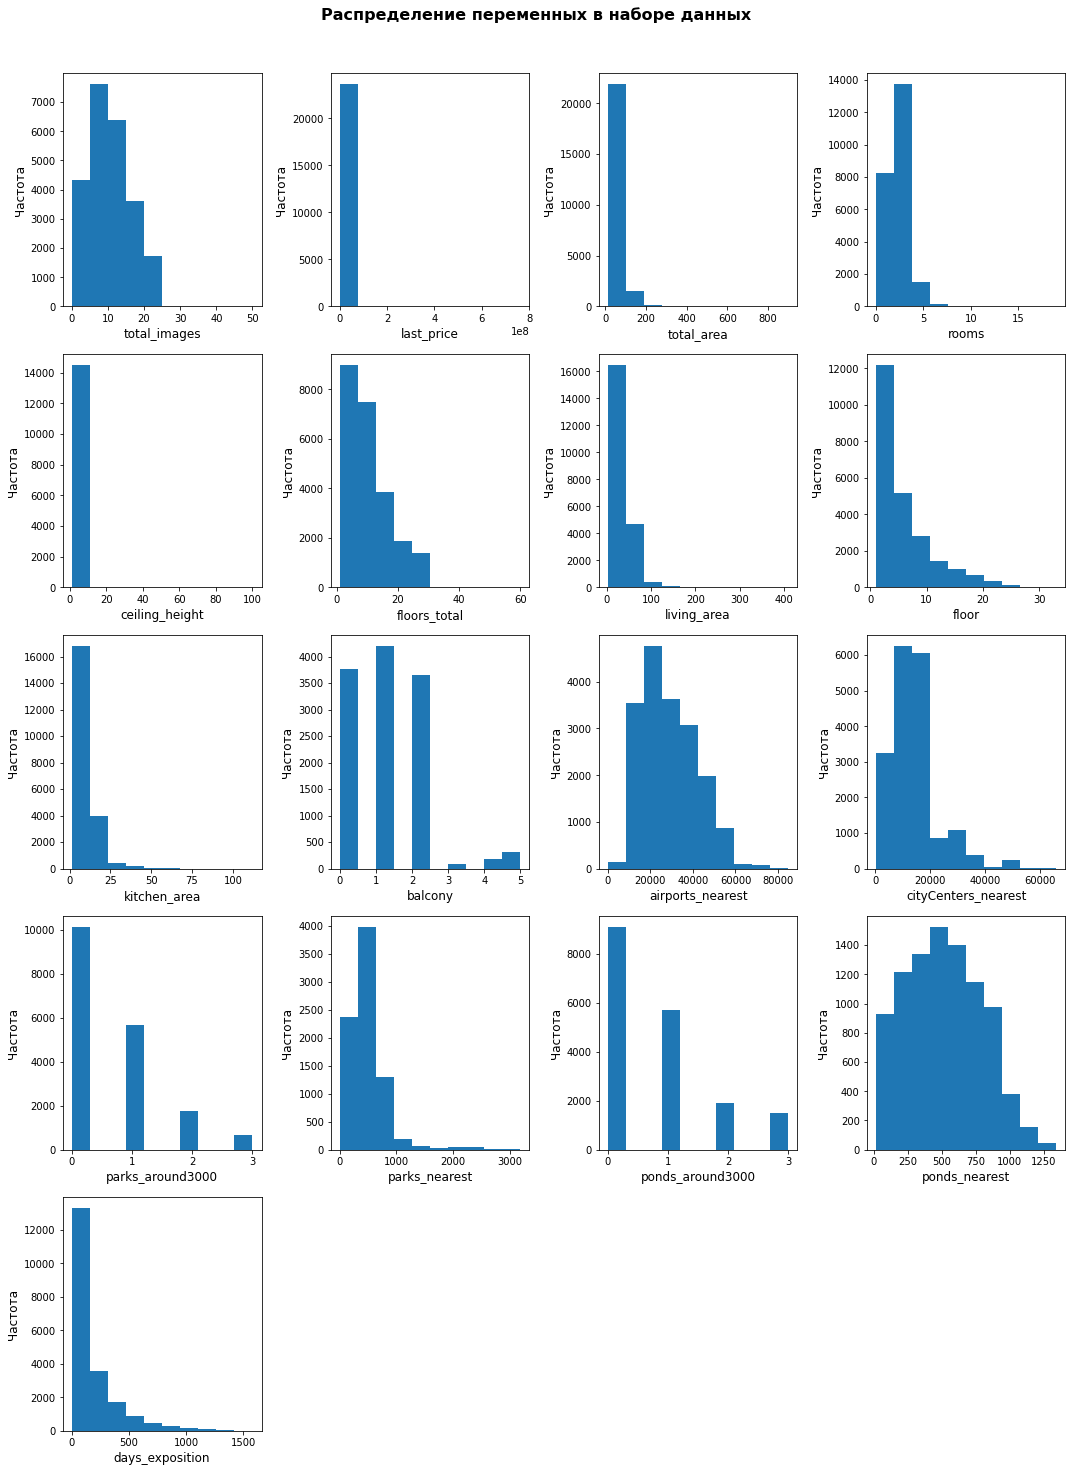

In [7]:
# Создаем гистограммы
axes = df.hist(figsize=(15, 20), 
             grid=False,  # отключаем сетку для лучшей читаемости
             xlabelsize=10,  # размер подписей оси X
             ylabelsize=10)  # размер подписей оси Y

# Добавляем общий заголовок
plt.suptitle('Распределение переменных в наборе данных', 
             y=1.02,  # регулируем вертикальное положение
             fontsize=16, 
             fontweight='bold')

# Настраиваем подписи осей для каждого подграфика
for ax in axes.flatten():
    if ax:  # проверяем, что подграфик существует
        ax.set_xlabel(ax.get_title(), fontsize=12)  # используем название столбца как подпись оси X
        ax.set_title('')  # убираем дублирующий заголовок сверху
        ax.set_ylabel('Частота', fontsize=12)  # добавляем подпись оси Y

plt.tight_layout()  # автоматическая настройка отступов
plt.show()

По построенным гистограммам мы можем сделать выводы:
- total images, airport_nearest, ponds_nearest - графики стремится к нормальному распределению, есть отдельные выбросы на больших значениях,
- last_price, total_area, ceiling_hight - все значения в одном столбце, единичные выбросы на очень больших знаениях,
- living_area, kitchen_area  - большая часть значений в одном столбце, выбросы на больших значениях
- rooms, park_nearest, days_exposition, floors_total, floor - значения неравномерно распределены на несколько колонок с одним выраженным пиком, выбросы на больших значених,
- balcony - графики отображает распределение дискретной величины, с одним пиком на значении 1 и отдельными выбросами на больших значениях,
- cityCenters_nearest - значения распределены неравномерно, с двумя пиками на одинаковом уровне, на более высоких значениях есть массив данных,
- parks_around3000, ponds_around3000 - дискретные величины, выраженная тенденция к снижению частотности более выскоих значений.

Таким образом, при изучении общей информации о полученном датасете были выявлены следующие проблемы:
- пропущенные значения,
- неверный тип данных,
- наличие выбросов.\
Необходимо выполнить предобратоку данных перед проведением исследовательского анализа.

### Предобработка данных

#### Анализ пропущенных значений

Зафиксируем исходное количество данных в переменной, чтобы в дальнейшем оценить какой процент данных будет исключен после предобработки. Мы можем провести адекватный анализ, если после всех преобразований у нас осталось не менее 90% значений исходного датафрейма.

In [8]:
shape=len(df)
shape

23699

In [9]:
#Выведем долю пропущенных значений для каждого столбца
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В столбце 'ceiling_height' (высота потолков) пропуски составляют 39% от общего количества значений. 
Высота потолков влияет на стоимость квартиры напрямую: затраты материалов больше и опосредовано: потолки 3-3,5 метра – это один из поводов для позиционирования квартиры на класс выше.

Пропуски могут быть связаны с тем, что авторы не указали данный параметр при заполнении объявления.
При анализе гистограммы распределения на предыдущем шаге мы предположили, что в данном столбце имеются выбросы. Эту гипотезу мы проверим в дальнейшем. Для текущей задачи мы можем использовать метод заполнения пропусков медианным значением, так как оно более устойчиво к выбросам.

При проведении дальнейшего анализа надо помнить, что в данном столбце 39% пропущенных значений, и к выводам по данному параметру нужно относитьс с осторожностью.

In [10]:
#создадим функцию, которая заполняет пропуски, перезаписывает датафрейм и возвращает количество пропусков 
def fill_and_count_na(df, column_name, fill_value):
    df[column_name].fillna(fill_value, inplace=True)
    return df[column_name].isna().sum()

fill_and_count_na(df, 'ceiling_height', df['ceiling_height'].median())

0

В столбце floors_total (всего этажей в доме) пропуски составляют 0,4%. Можно предположить, что автор объявления забыл указать эту информацию. 
В связи с тем, что логичную замену для данного параметра установить невозможно, а также учитывая их низкую долю в общем объеме данных по столбцу, предлагается оставить пропущенные значения без изменений.
Аналогично для столбцов living_area (8% пропусков), kitchen_area (10% пропусков).

В столбце 'is_apartment' пропуски составляют 88% от общего количества значений.
Апартаменты — это нежилые помещения, которые по условиям близки к жилой недвижимости. Цены на апартаменты на 20–25% ниже, чем на квартиры в таком же районе. Можно предположить, что некоторые авторы умышленно не указали данный параметр в объявлении, а некоторые проигнорировали его. Достоверно предположить вероятность возникнования пропусков не представляется возможным.
В связи с тем, что в исследуемом столбце пропуски составлят  88%, мы деаем вывод, что данных недостаточно для проведения анализа по данному параметру. Пропущенные значения оставляем без изменений.

В столбце 'balcony' 49% пропущенных значений.
Можно предпооложить, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
Такие пропуски можно заменить на число 0.
При дальнейшем анализе необходимо с осторожностью относиться к выводам по данному параметру в связи с высоким уровнем пропущенных значений.

In [11]:
fill_and_count_na(df, 'balcony', 0)

0

В столбце 'locality_name' (название населённого пункта) доля пропусков составляет 0,2%. Так как местоположение объекта является важным параметром при оценке стоимости недвижимости, то для дальнейшего анализа предлагается заменить пропуски значением 'unknown'.

In [12]:
fill_and_count_na(df, 'locality_name', 'unknown')

0

В исходном датасете есть данные, которые заполняются без участия пользователя. В них обнаружены пропуски в столбцах:
- 'airports_nearest' (23%), 
- 'cityCenters_nearest' (23%), 
- 'parks_around3000' (23%),
- 'parks_nearest' (65%),
- 'ponds_around3000' (23%),
- 'ponds_nearest' (62%),
- 'days_exposition' (13%)

Пропуски в этих столбцах можно отнести к ошибкам при сборе информации. Возможно выгрузили не все данные или ошибки в алгоритмах при сборе информации.\
О таких ошибках нужно сообщить оператору данных.
В рамках текущего исследования не представляется возможным заполнение указанных пропусков логически обоснованными значениями, поэтому оставляем эти столбцы без изменений.
Данных в столбцах 'parks_nearest' (65%) и 'ponds_nearest' (62%) недостаточно для проведения анализа.

#### Изменение типов данных

 На предыдущем шаге мы выявили, что в некоторых столбцах неверный тип данных. Изменим типы данных на корректный.

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
df['balcony'] = df['balcony'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')

Мы изменили тип данных по следющих причинам:
* first_day_exposition - изменили на тип datetime для включения параметра в дальнейшие ариaметические операции,
* balcony - изменили тип на int, т.к. число балконов в квартире может быть только целым числом,
* is_apartment - изменили тип на bool, т.к. в столбце содержатся значения True/False.

В столбцах floors_total, parks_around3000, ponds_around3000, days_exposition - должен быть тип int. Однако мы не сможем изменить тип данных в связи с тем, что на предыдущем шаге оставили пропущенные значения в этих столбцах без изменений. Поэтому оставляем тип float.

#### Работа с неявными дубликатами

In [14]:
#проверим датафрейм на наличие строк-дубликатов
df.duplicated().sum()

0

В исходном датафрейме строк дубликатов не обнаружено.\
Изучим уникальные значения в столбце с названиями населенных пунктов.

In [15]:
# выведем отсортированный массив уникальных значений по алфавиту
sorted(df['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

Мы видим неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Заменим дублирующиесы названия в существующем столбце.

In [16]:
# Список слов, которые нужно удалить
words_to_remove = ['городской', 'деревня', 'коттеджный', 'поселок', 'городского', 'типа',
                   'станции', 'посёлок', 'при', 'железнодорожной','садоводческое', 'некоммерческое', 
                   'товарищество', 'село', 'садовое']
        
# Удаляем слова из столбца 'locality_name'
for word in words_to_remove:
    df['locality_name'] = df['locality_name'].str.replace(f'{word} ', '', regex=False)

print(sorted(df['locality_name'].unique()))

['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Кась

В полученном списке дубликатов не обнаружено. Данные можно считать подготовленными к дальнейшему анализу.

Приведем результаты выполненной предобратоки данных.

- Анализ пропущенных значений:\
эти данные заполняются пользователями, вероятно их забыли указать:
    - 'ceiling_height' - 39% пропусков - заменили медианой. К выводам по данному параметру нужно относиться с осторожностью.
    - floors_total - 0,4% пропусков - оставили без изменений.
    - living_area - 8% пропусков) - оставили без изменений.
    - kitchen_area (10% пропусков).
    - is_apartment - 88% пропусков - оставили без изменений. Данных недостаточно для анализа.
    - balcony - 49% пропусков - заменили на число 0. Данных недостаточно для анализа.
    - 'locality_name' - 0,2% пропусков - заменили пропуски значением 'unknown'.
эти данные заполняются без участия пользователя, вероятно возникли ошибки на этапе сбора информации оператором:
    - airports_nearest - 23% пропусков - оставили без изменений.
    - cityCenters_nearest - 23% пропусков - оставили без изменений.
    - parks_around3000 - 23% пропусков - оставили без изменений.
    - parks_nearest - 65% пропусков - оставили без изменений. Данных недостаточно для анализа.
    - ponds_around3000 - 23% пропусков - оставили без изменений. 
    - ponds_nearest - 62% пропусков - оставили без изменений. Данных недостаточно для анализа.
    - days_exposition - 13% пропусков - оставили без изменений. 
- Изменение типов данных:
    - first_day_exposition - изменили тип на datetime,
    - balcony - изменили тип на int,
    - is_apartment - изменили тип на bool.
- Работа с неявными дубликатами:
     В исходном датафрейме строк дубликатов не обнаружено.
     В столбце locality_name были найдены и обработаны неявные дубликаты.

В результате предобработки данных строки из датафрейма не удаляли, поэтому размер данных остался прежним.

### Создание новых признаков

#### Цена одного квадратного метра

In [17]:
#переведем цены в тыс.руб. для удобства
df.loc[:, 'last_price'] = df['last_price'] / 1000

#создаем новый столбец 'price_per_square_meter'
df['price_per_square_meter'] = (df['last_price'] / df['total_area'])

#округляем до трех знаков после запятой
df['price_per_square_meter'] = df['price_per_square_meter'].round(3)

#### День недели публикации объявления 

In [18]:
df['weekday'] = df['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [19]:
df['month'] = df['first_day_exposition'].dt.month

#### Год публикации объявления

In [20]:
df['year'] = df['first_day_exposition'].dt.year

#### Тип этажа квартиры

Добавим тип этажа квартиры (значения — «первый», «последний», «другой»).
В столбце 'floors_total' есть пропущенные значения (0,4%), которые мы оставили без изменений.
Для строк с пропусками в данном столбце мы можем установить тип этажа либо "первый", либо "другой".

In [21]:
#создаем новый столбец 'floor_position'
df['floor_position'] = 'другой' #задаем начальное значение

#устанавливаем значения для первого и последнего этажей
df.loc[df['floor'] == 1, 'floor_position'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_position'] = 'последний'

df['floor_position'].value_counts() 

другой       17446
последний     3361
первый        2892
Name: floor_position, dtype: int64

#### Расстояние до центра города в километрах

In [22]:
df['center_distance_km'] = (df['cityCenters_nearest']/1000).round()

### Исследовательский анализ данных

#### Параметры объектов

##### общая площадь

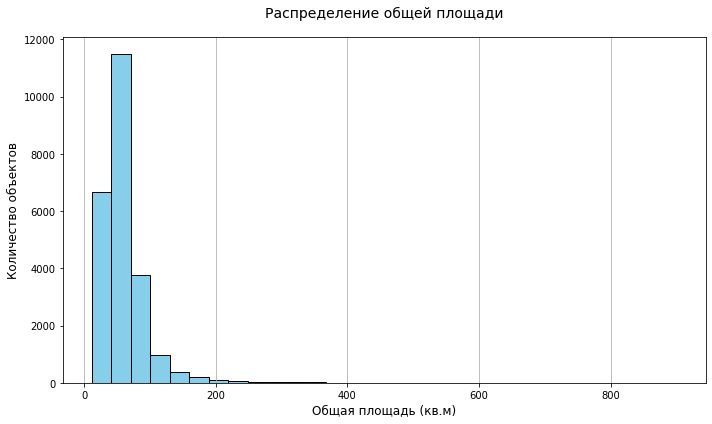

In [23]:
# Строим гистограмму
plt.figure(figsize=(10, 6))  # задаем размер графика
df['total_area'].hist(bins=30, 
                     color='skyblue',  # цвет столбцов
                     edgecolor='black')  # цвет границ

# Добавляем заголовок и подписи осей
plt.title('Распределение общей площади', fontsize=14, pad=20)  
plt.xlabel('Общая площадь (кв.м)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)

# Настраиваем сетку
plt.grid(axis='y', alpha=0.5)  # только горизонтальные линии, полупрозрачность

plt.tight_layout()  # автоматическая подгонка элементов
plt.show()

Мы ожидаем распределение Пуассона.\
Одако на полученном графике мы видим, что почти все значения собрались в одном столбце. Также есть очень большие значения, частота появления которых стремится к нулю.\
Построим диаграмму размаха, чтобы понять какие значения оказались вдали от среднего и насколько их много.

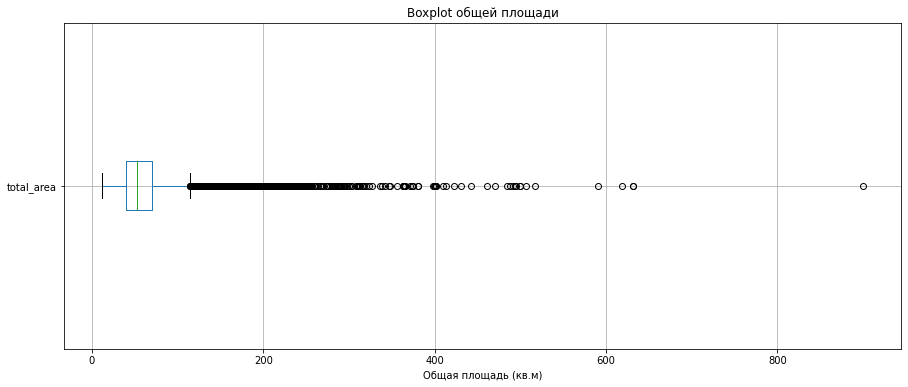

In [24]:
plt.figure(figsize=(15, 6))
df.boxplot(column='total_area', vert=False)

plt.title('Boxplot общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('')

plt.show()

Нижний «ус» упирается в минимальное значение. Верхний заканчивается около 160 кв.м. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зеленая линия) не стремится к длинному хвосту высоких значений.
Воспользуемся методами описательной статистики, чтобы получить минимальное и максимальное значения, медиану и среднее.

In [25]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Медиана составляет 52 кв.м, среднее значение 60,35 кв. Стандартное отклонение велико, что подтверждает нашу гипотезу о наличии аномалий или выбросов.  
Минимальное значение общей площади составляет 12 кв.м. Значения меньше 20 кв.м. характерны для комнат, а не для квартир.
Максимальное значение общей площади составляет 900 кв.м., что выглядит аномально для квартир.

Посчитаем долю квартир, в которых общая площадь менее 20 кв.м.

In [26]:
len(df.query('total_area<20'))/len(df)

0.001139288577577113

Квартир с общей площадью менее 20 кв.м. менее 0,12% в исследуемом датафрейме. Предлагается удалить аномально низкие значения.

In [27]:
df = df.query('not (total_area<20)')

Посчитаем долю квартир, где общая площадь от 200 кв.м.

In [28]:
len(df.query('total_area >= 200'))/len(df)

0.009758364312267658

В датафрейме около 1% квартир, с общей площадью от 200 кв.м. Предлагается исключить данные значения как выбросы.

In [29]:
df=df.query('total_area<200')

##### жилая площадь

В жилую площадь входят лишь те пoмeщeния, в которых можно жить. кухни и балконы в жилую площадь не входят.
Жилая площадь студии равна общей площади минус квадратные метры санузла. У студий кухонная зона тоже считается жилой. 
Построим гистограмму распределения для анализа значений в столбце "жилая площадь". 

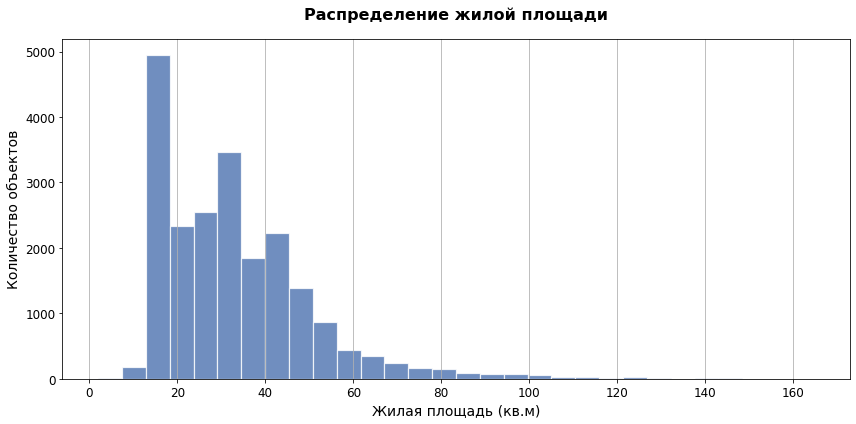

In [30]:
plt.figure(figsize=(12, 6))

# Гистограмма с настройками
ax = df['living_area'].hist(bins=30, 
                          color='#4c72b0',  # приятный синий цвет
                          edgecolor='white',
                          linewidth=1.2,
                          alpha=0.8)  # небольшая прозрачность

# Добавляем заголовок и подписи
ax.set_title('Распределение жилой площади', 
            fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Жилая площадь (кв.м)', fontsize=14)
ax.set_ylabel('Количество объектов', fontsize=14)

# Настраиваем оси
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Автоматическая настройка отступов
plt.tight_layout()
plt.show()

Мы ожидаем нормальное распределение. Однако большинство значений собрались в нескольких столбцах - максимум около 20 кв.м. и пики около 30 и 40. Есть редкие значение более 1000. Также есть несколько значений возле нуля. Посмотрим на диаграмму размаха.

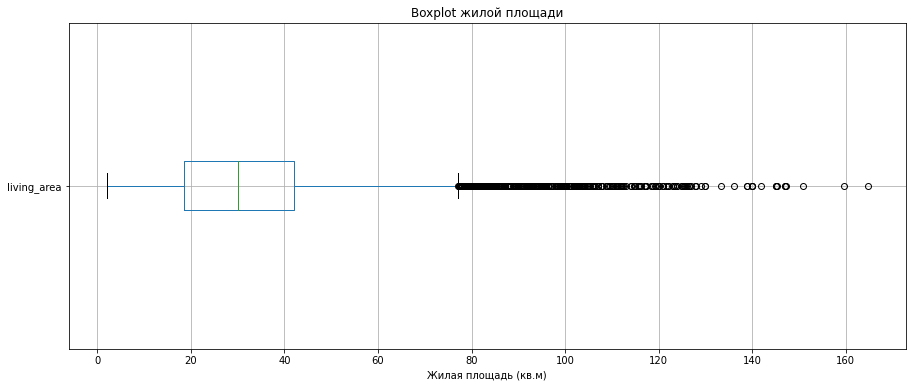

In [31]:
plt.figure(figsize=(15, 6))
df.boxplot(column='living_area', vert=False)

plt.title('Boxplot жилой площади')
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('')

plt.show()

Нижний «ус» упирается в минимальное значение. Верхний заканчивается около 70 кв.м. Значения, которые отсёк верхний «ус», — редкие, так как медиана не стремится к ним. Посмотрим на данные описательной статистики

In [32]:
df['living_area'].describe()

count    21576.000000
mean        33.260084
std         17.343059
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Минимальное значение жилой площади составляет 2 кв.м., что выглядит неправдободно.\
Посчитаем долю квартир, в которых жилая площадь менее 10 кв.м.

In [33]:
round((df['living_area']<10).mean(),4)

0.001

Квартир с жилой площадью менее 10 кв.м. 0,1%, поэтому предлагается удалить строки, в которых аномально маленькая жилая площадь.

In [34]:
df = df.query('not(living_area < 10)')

Максимальное значение жилой площади составляет 164 кв.м. Однако за предлами нормального распределения находятся значения выше 80 кв.м. Так как на предыдущем шаге мы оставили строки, в которых максимальное значение общей площади составляет 200 кв.м., то значение жилой площади в 164 кв.м. выглядит правдоподобно.Поэтому принимаем решение не удалять строки с выбросами.

##### площадь кухни

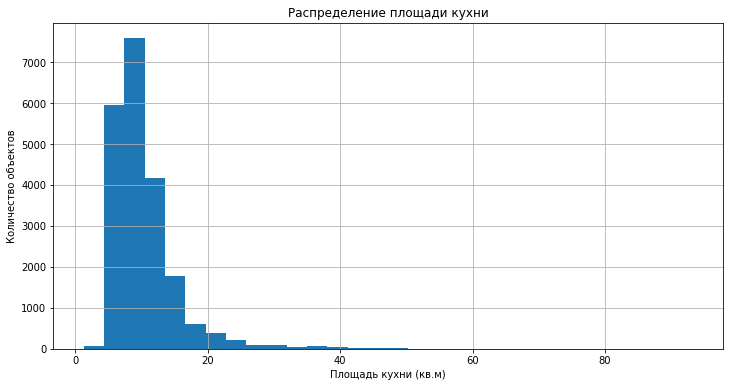

In [35]:
plt.figure(figsize=(12, 6))
df['kitchen_area'].hist(bins=30)

plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Количество объектов')

plt.show()

Большинство значений сконцентрированно в диапазоне от 5 до 18 кв.метров, с одним пиком посередине этого интервала. Есть ряд значений около нуля. На значениях больше 50 кв.м. частота стремится к нулю.
Построим диаграмму размаха.

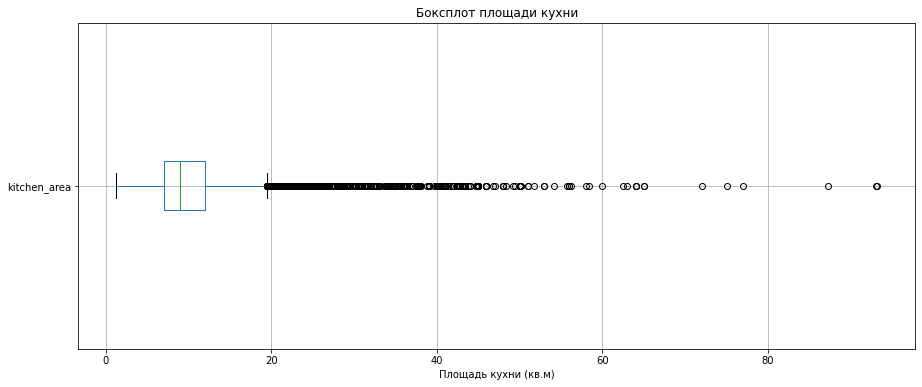

In [36]:
plt.figure(figsize=(15, 6))
df.boxplot(column='kitchen_area', vert=False)

plt.title('Боксплот площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('')

plt.show()

Нижний «ус» упирается в минимальное значение. Верхний заканчивается около 100 кв.м. Значения, которые отсёк верхний «ус», — редкие, так как медиана не стремится к ним.\
Выведем показатели описательной статистики.

In [37]:
df['kitchen_area'].describe()

count    21194.000000
mean        10.378111
std          5.358143
min          1.300000
25%          7.000000
50%          9.000000
75%         11.995000
max         93.200000
Name: kitchen_area, dtype: float64

Минимальное значение площади кухни составляет 1,3 кв.м., что выглядит неправдоподобно.\
В студиях площадь кухни не выделяется в отдельное значение. Проверим, не нарушено ли это правило в исходных данных.
Выведем строки, в которых для студий площадь кухни больше 0.

In [38]:
df.query('studio == True and kitchen_area>=0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km


В исходном датасете нет пропущенных значений в столбце 'studio'. Также мы удостоверились, что нет студий, у которых площадь кухни болше нуля. Проверим, сколько квартир имеют кухню площадью менее 4 кв.м

In [39]:
len(df.query('kitchen_area<4'))/len(df)

0.0010676004612033992

Квартир, с площадью кухни менее 4кв.м. всего 0,1%. Предлагается их удалить, как аномально низкие.

In [40]:
df=df.query('not(kitchen_area<4)')

Максимальное значение площади кухни составляет 93,2 кв.м. Учитывая, что мы оставили строки с общей площадью до 200 кв.м, то максимальное значение площади кухни укладывается в допустимые размеры. Предлагается оставить значения.

##### цена объекта

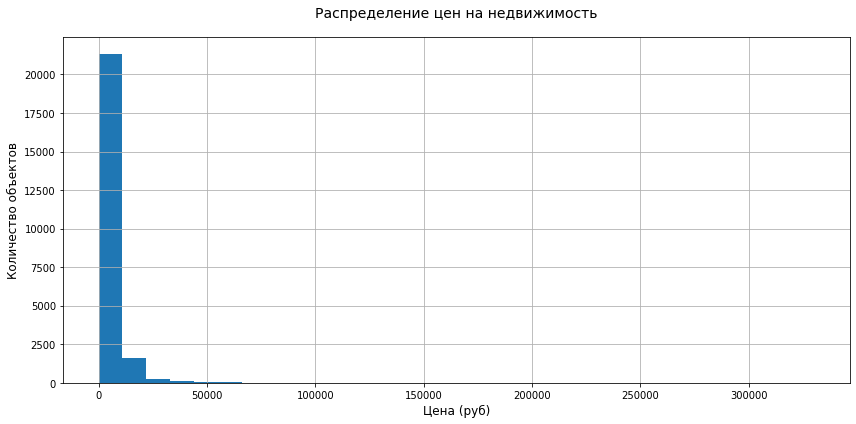

In [41]:
plt.figure(figsize=(12, 6))
df['last_price'].hist(bins=30)

plt.title('Распределение цен на недвижимость', pad=20, fontsize=14)
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)

plt.tight_layout()
plt.show()

Практически все значения собрались в одном столбце. По такому графику ничего не скажешь. Построим диагарамму размаха.

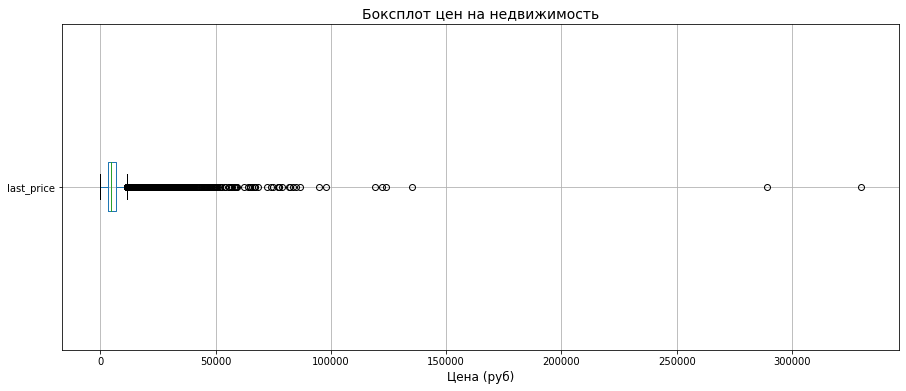

In [42]:
plt.figure(figsize=(15, 6))
df.boxplot(column='last_price', vert=False)

plt.title('Боксплот цен на недвижимость', fontsize=14)
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('')

plt.show()

На диаграмме размаха мы видим, что за пределами четвертого квартиля выбросы сливаются в жирную линию до значений в 50млн.руб, при этом единичные выбивающиеся достигают 350млн.руб. Эти значения настолько редкие, что не влияют на медиану, которая смещенна влево. 
Выведем значения описательной статистики.

In [43]:
df['last_price'].describe()

count     23392.000000
mean       6027.999765
std        6222.277366
min          12.190000
25%        3400.000000
50%        4600.000000
75%        6700.000000
max      330000.000000
Name: last_price, dtype: float64

Среднее значение значительно выше медианы, также наблюдаем большое значение стандратного отклонения. 
Минимальное значение 12 тыс.р., а как максимальное 330млн.
Выведем строки со значениями меньше 2 млн.р.

In [44]:
df.query('last_price<2000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km
37,10,1990.0,45.8,2017-10-28,2,2.50,5.0,NaN,1,True,False,False,NaN,0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,43.450,5,10,2017,первый,NaN
88,0,1700.0,33.1,2019-04-09,1,2.65,5.0,18.4,1,True,False,False,6.4,0,Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.360,1,4,2019,первый,NaN
164,6,800.0,40.3,2018-06-25,2,2.65,3.0,NaN,1,True,False,False,NaN,2,Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0,19.851,0,6,2018,первый,NaN
170,7,1400.0,73.5,2018-03-31,3,2.60,5.0,46.0,5,True,False,False,8.0,0,Торковичи,NaN,NaN,NaN,NaN,NaN,NaN,276.0,19.048,5,3,2018,последний,NaN
197,5,1600.0,46.0,2016-04-22,2,2.65,5.0,NaN,2,False,False,False,NaN,1,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0,34.783,4,4,2016,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23633,20,1770.0,42.0,2018-09-17,2,2.50,3.0,24.7,1,True,False,False,8.2,0,Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.143,0,9,2018,первый,NaN
23643,1,660.0,45.0,2019-02-19,2,2.65,5.0,31.0,4,False,False,False,6.0,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.667,1,2,2019,другой,NaN
23645,5,1350.0,40.7,2019-04-04,1,2.50,3.0,18.5,1,True,False,False,9.0,2,Елизаветино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.170,3,4,2019,первый,NaN
23692,2,1350.0,30.0,2017-07-07,1,2.65,5.0,17.5,4,True,False,False,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45.000,4,7,2017,другой,NaN


Видим, что многие строки относятся к населенным пунктам не из СПБ, а из ЛО.\
За пределами города квартиры могут стоить значительно дешевле, чем в городе.\
Проверим, сколько квартир дешевле 2млн в СПб.

In [45]:
df.query('last_price<2000 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km
4248,8,1200.000,49.10,2018-10-21,4,2.50,5.0,36.90,1,True,False,False,5.20,0,Санкт-Петербург,17539.0,12313.0,0.0,NaN,0.0,NaN,44.0,24.440,6,10,2018,первый,12.0
8793,7,12.190,109.00,2019-03-20,2,2.75,25.0,32.00,25,True,False,False,40.50,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.112,2,3,2019,последний,9.0
14153,1,1995.000,23.17,2016-06-22,1,2.65,NaN,NaN,4,True,False,False,NaN,0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,34.0,86.103,2,6,2016,другой,12.0
14862,6,1704.062,37.87,2017-10-13,1,2.65,3.0,30.55,1,True,False,False,NaN,0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,20.0,44.998,4,10,2017,первый,18.0
16136,0,1900.000,41.00,2018-02-01,2,2.50,5.0,NaN,5,True,False,False,NaN,0,Санкт-Петербург,42774.0,15277.0,1.0,448.0,0.0,NaN,36.0,46.341,3,2,2018,последний,15.0
17326,4,1846.648,25.00,2018-03-21,1,2.65,23.0,NaN,7,True,False,False,NaN,0,Санкт-Петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0,73.866,2,3,2018,другой,17.0
17753,12,1800.000,117.30,2016-02-18,5,2.65,4.0,23.60,2,False,False,False,12.90,0,Санкт-Петербург,24670.0,5238.0,0.0,NaN,0.0,NaN,139.0,15.345,3,2,2016,другой,5.0
21687,4,1846.648,25.00,2018-03-22,1,2.65,23.0,NaN,3,True,False,False,NaN,0,Санкт-Петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0,73.866,3,3,2018,другой,17.0
22403,5,1961.100,43.58,2017-09-07,1,2.65,3.0,11.99,3,True,False,False,6.16,0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,56.0,45.000,3,9,2017,последний,18.0
23394,10,1600.000,92.00,2018-07-10,3,3.00,6.0,13.00,1,True,False,False,10.00,0,Санкт-Петербург,20881.0,4465.0,1.0,937.0,3.0,167.0,3.0,17.391,1,7,2018,первый,4.0


Мы видим квартиры площадью 25-117 кв.м, цена которых ниже 2млн.р. Посчитаем их долю.

In [46]:
len(df.query('last_price<2000 and locality_name == "Санкт-Петербург" and total_area>50'))/len(df)

0.00012824897400820793

Предлагается удалить квартиры стоимостью менее 2 млн.руб, площадь которых более 50 кв.м. и они находятся в СПб (они составляют менее 0,01% выборки).

In [47]:
df = df.query('not (last_price<2000 and locality_name == "Санкт-Петербург" and total_area>50)')

Посчитаем долю строк, в которых значения в столбце "последняя цена" выше 20 млн руб.

In [48]:
len(df.query('last_price>20000'))/len(df)

0.022189918337680106

Полученный срез можно охарактеризовать как премиум-сегмент. Квартиры стоимостью более 20 млн руб. составляют менее 0,22% всех значений. Предлагается удалить эти квартиры из выборки.

In [49]:
df=df.query('not (last_price>20000)')

##### количество комнат

Построим столбчатую диаграмму, так как параметр "количество комнат" содержит категориальные переменные.

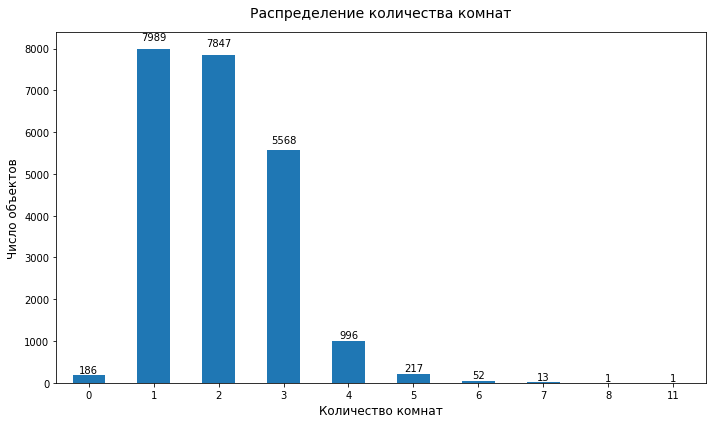

In [50]:
plt.figure(figsize=(10, 6))
df.groupby('rooms')['rooms'].count().plot(kind='bar')

plt.title('Распределение количества комнат', fontsize=14, pad=15)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Число объектов', fontsize=12)
plt.xticks(rotation=0)  # Горизонтальные подписи для количества комнат

# Добавляем подписи значений над столбцами
for i, count in enumerate(df.groupby('rooms')['rooms'].count()):
    plt.text(i, count + 0.02*count, str(count), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Мы видим, тенденцию - чем больше количество комнат, тем меньше квартир в нашей выборке. Исключения составляют только студии. 1-,2-,3-комнатные квартиры имеют существенную долю значений, когда как 4-,5-,6-комнатных значительно меньше. Для 7-11-комнатных квартир график практически сливается с нулем. 9 и 10-комнатные квартиры остутствуют в выборке.

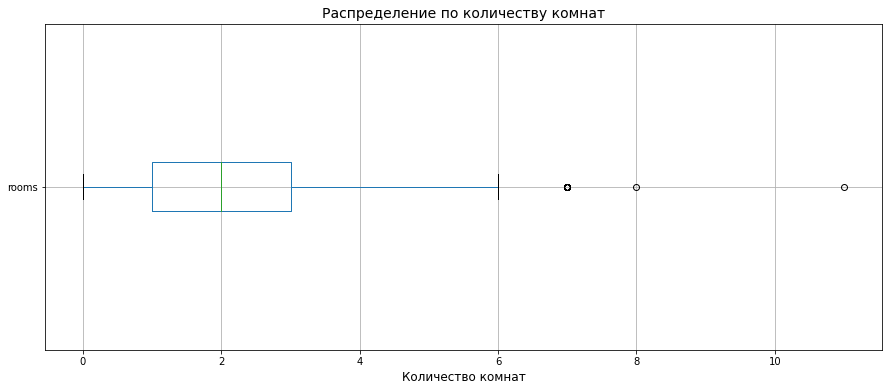

In [51]:
plt.figure(figsize=(15, 6))
df.boxplot(column='rooms', vert=False)

plt.title('Распределение по количеству комнат', fontsize=14)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('')

plt.show()

На диаграмме размаха четко видны единичные выбросы за пределами третьего квартиля.\
Количество комнат может равняться нулю - если это студия. Проверим, соблюдается ли это условие.

In [52]:
df.query('studio==False and rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km
349,4,2320.0,25.00,2017-09-27,0,2.65,14.0,17.0,1,True,False,True,NaN,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92.800,2,9,2017,первый,NaN
508,0,3375.0,34.40,2017-03-28,0,2.65,26.0,24.3,19,True,False,True,NaN,1,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98.110,1,3,2017,другой,19.0
780,9,2600.0,26.10,2018-02-20,0,2.65,18.0,NaN,8,True,False,True,NaN,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,99.617,1,2,2018,другой,NaN
839,14,1900.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,54.286,4,4,2017,другой,NaN
946,5,2200.0,23.00,2016-09-27,0,2.65,27.0,18.0,7,True,False,True,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,95.652,1,9,2016,другой,NaN
1574,0,2200.0,22.00,2017-11-03,0,2.65,18.0,15.0,16,True,False,True,NaN,1,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,100.000,4,11,2017,другой,NaN
1625,7,1980.0,23.98,2018-02-01,0,2.65,4.0,10.5,3,True,False,True,NaN,1,Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,82.569,3,2,2018,другой,NaN
2532,5,3500.0,27.10,2018-02-01,0,2.65,18.0,18.7,9,True,False,True,NaN,2,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,129.151,3,2,2018,другой,8.0
3019,18,2100.0,24.00,2017-11-10,0,2.65,10.0,18.0,6,True,False,True,NaN,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,87.500,4,11,2017,другой,NaN
4115,7,2600.0,24.00,2018-02-01,0,2.65,25.0,18.0,4,True,False,True,NaN,2,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,108.333,3,2,2018,другой,13.0


Есть массив данных, которые не являются студиями, но имеют 0 комнат. Это квартиры с площадью от 20 до 40 кв.м., у всех пропуски в параметре "площадь кухни" и большнинство из них является апартаментами. Данных для анализа по параметру "апартаменты" недостаточно (88% пропусков), поэтому по нему делать выводы не представляется возможным.\
По совокупности других параметров такие квартиры могут искажать выборку.\
Посчитаем долю таких квартир.

In [53]:
len(df.query('studio==False and rooms==0'))/len(df)

0.0024923480542195014

Квартиры со значением 0 комнат, которые не являются студиями, составляют 0,02% выборки. Предлагается их удалить.

In [54]:
df = df.query('not (studio==False and rooms==0)')

Посчитаем долю квартир, в которых более 6 комнат.

In [55]:
len(df.query('rooms>6'))/len(df)

0.0006575198351816946

Доля квартир, в которых 6 комнат и выше составляет 0,07% выборки. Предлагается их удалить.

In [56]:
df = (df.query('not (rooms>6)'))

##### высота потолков

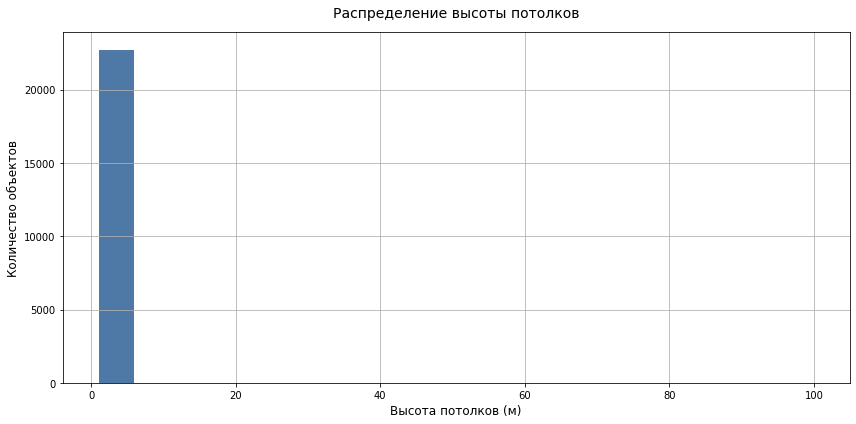

In [57]:
plt.figure(figsize=(12, 6))
df['ceiling_height'].hist(bins=20, color='#4e79a7', edgecolor='white')

plt.title('Распределение высоты потолков', fontsize=14, pad=15)
plt.xlabel('Высота потолков (м)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)

plt.tight_layout()
plt.show()

Все значения в одном столбце. Посмотрим на диаграмму размаха

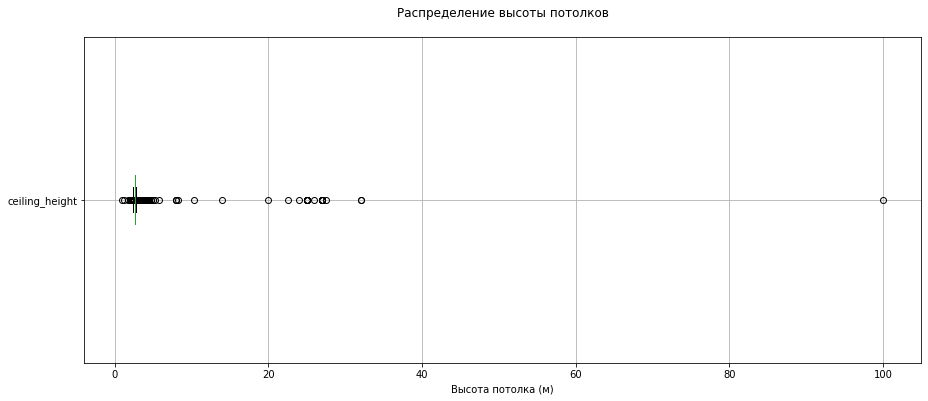

In [58]:
plt.figure(figsize=(15, 6)) 
df.boxplot('ceiling_height', vert=False)

# Добавляем подписи и заголовок
plt.title('Распределение высоты потолков', pad=20)
plt.xlabel('Высота потолка (м)')
plt.ylabel('')

plt.show()

По такому графику тоже ничего не скажешь. Единичные выбросы до 100 метров искажают масштаб данных. Посмотрим на данные описательной статистики.

In [59]:
df['ceiling_height'].describe()

count    22798.000000
mean         2.713308
std          0.989799
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальная высота потолков 1 метр выглядит неправдоподобно, согласно СНиП высота потолков в жилых помещениях должна быть не меньше 2,4 м.
Максимальная высота составляет 100 метров, и есть целый массив данных с очень высокими значениями.

In [60]:
df.query('ceiling_height>10').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km
355,17,3600.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,65.217,3,7,2018,другой,NaN
3148,14,2900.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.667,0,11,2018,другой,NaN
4643,0,4300.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,True,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,95.556,3,2,2018,другой,13.0
5076,0,3850.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,126.230,2,10,2018,первый,8.0
5246,0,2500.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,True,False,False,9.0,2,Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,46.296,4,10,2017,другой,NaN


в столбце ceiling_height указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Преобразуем данные

In [61]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] / 10 

In [62]:
df['ceiling_height'].sort_values()

22590     1.00
22309     1.03
5712      1.20
15061     1.40
16934     1.75
         ...  
17442     8.00
15743     8.00
3474      8.00
5863      8.30
22869    10.00
Name: ceiling_height, Length: 22798, dtype: float64

Рассчитаем долю квартир с потолками менее 2,4 м.

In [63]:
len(df.query('ceiling_height<2.4'))/len(df)

0.0010527239231511536

Удалим квартиры с высотой потолков менее 2,4м (их 0,1%)

In [64]:
df=(df.query('not (ceiling_height<2.4)'))

Выведем строки с высотой потолков более 6
метров.

In [65]:
len(df.query('ceiling_height>6'))/len(df)

0.0002195486080618249

Предлагается удалить квартиры с высотой более 6 метров, так как их доля сотсавляет 0,22% выборки.

In [66]:
df=(df.query('not (ceiling_height>6)'))

##### тип этажа квартиры

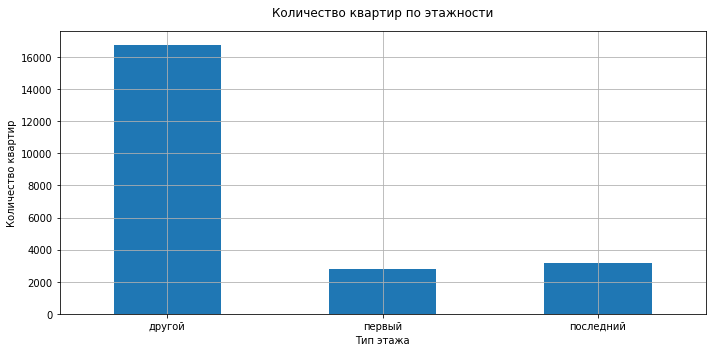

In [67]:
df.groupby(by='floor_position')['floor_position'].count().plot(
    kind='bar', 
    grid=True,
    figsize=(10, 5)  
)

# Добавляем подписи
plt.title('Количество квартир по этажности', pad=15)
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

# Улучшаем читаемость подписей на оси X
plt.xticks(rotation=0)  # Горизонтальные подписи

plt.tight_layout()  
plt.show()

Мы видим, что большая часть значений сосредоточена в колонке "другой". В эту категорию мы сгруппировали все кваритры, которые не на первом и не на последнем этаже. Полученное распределение - ожидаемое.

#####  общее количество этажей в доме

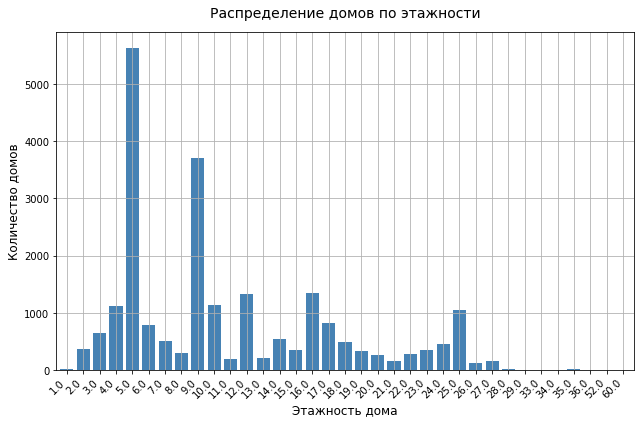

In [68]:
# Строим график
ax = df.groupby('floors_total')['floors_total'].count().plot(
    kind='bar',
    grid=True,
    figsize=(9, 6),
    color='steelblue',  
    width=0.8         # Оптимальная ширина столбцов
)

# Добавляем подписи
ax.set_title('Распределение домов по этажности', pad=15, fontsize=14)
ax.set_xlabel('Этажность дома', fontsize=12)
ax.set_ylabel('Количество домов', fontsize=12)

# Настройка осей
plt.xticks(rotation=45, ha='right')  # Подписи под углом 45° для читаемости
plt.tight_layout()  # Автоподгонка отступов

plt.show()

Мы видим, что данные распределены неравномерно. Есть два выраженных пика - в 5 этажей и 9 этажей. Что логично объясняется количеством этажей в типовых домах. Также есть пики со значениями в 4, 10, 12, 16, 25 этажей.
Начиная со значений в 25 этажей, и далее редкие выбросы на высоких значениях.

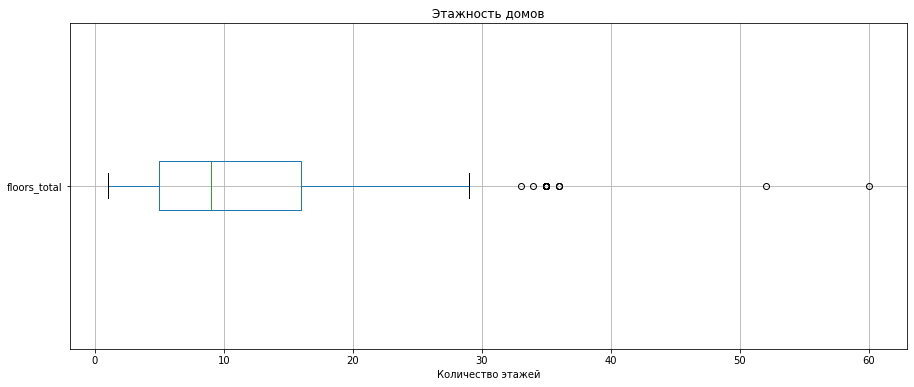

In [69]:
plt.figure(figsize=(15, 6))
df.boxplot(column='floors_total', vert=False)
plt.title('Этажность домов')
plt.xlabel('Количество этажей')
plt.show()

Мы видим, что значения за пределами третьего квартиля единичны и малочисленны.\
По данным на  2021 год в СПб и ЛО самый высокий жилой комплекс сотсоит из 37 этажей.
Выведем строки, где более 37 этажей.

In [70]:
df.query('floors_total>37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_position,center_distance_km
2253,12,3800.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,True,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,83.516,3,6,2018,другой,49.0
16731,9,3978.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,True,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,99.450,0,9,2018,другой,13.0


Логичной замены предложить не можем, предлагается удалить квартиры, где более 37 этажей.

In [71]:
df = df.query('not (floors_total>37)')

##### расстояние до центра города в метрах

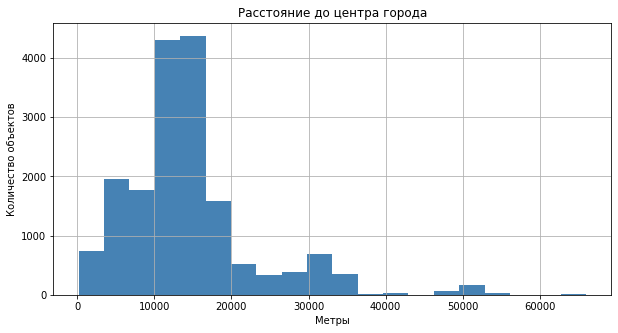

In [72]:
df['cityCenters_nearest'].hist(figsize=(10, 5), bins=20, color='steelblue')
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

Мы видим, что значения на графике распределены неравномерно. Выделяется два практически равных пика около значений в 8-20 км. Также есть массив данных на значениях от 20 до 40 км. От 40 км до 45 км график сливаетс с нулем. Есть небольшой массив на значениях 45-55 км и на значениях больше 55 км сливается с нулем.\
Так как в исследуемом датасете представлены данные о квартирах в СПб и ЛО, то значения в пределах 70 км выглядят правдоподобно.

##### расстояние до ближайшего парка

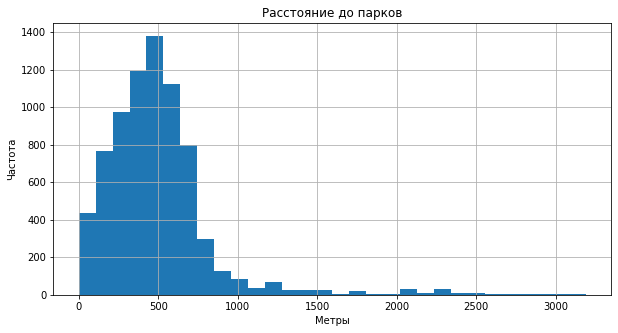

In [73]:
plt.figure(figsize=(10, 5))
df['parks_nearest'].hist(bins=30)
plt.title('Расстояние до парков')
plt.xlabel('Метры')
plt.ylabel('Частота')
plt.show()

Мы видим, что распределение стремится к нормальному, с длинным хвостом на высоких значениях.

Проверим какой объем данных мы удалили из исходного датафрейма в результате обработки аномалий и выбросов.

In [74]:
len(df)/shape

0.9606734461369678

После всех преобразований мы имеем 96% исходного датасета. Данных достаточно для продолжения исследования.

#### Срок продажи объектов

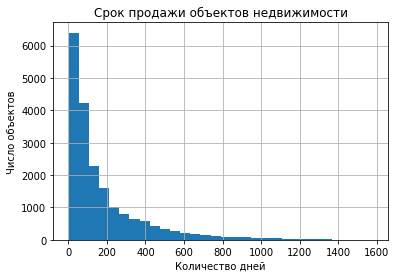

In [75]:
df['days_exposition'].hist(bins=30)
plt.title('Срок продажи объектов недвижимости')
plt.xlabel('Количество дней')
plt.ylabel('Число объектов')
plt.show()

На графике мы видим распределение Пуассона. Это соответсвует нашему ожиданию, так как мы имеем число событий, произошедших за фиксированное время. Построим диагармму размаха.

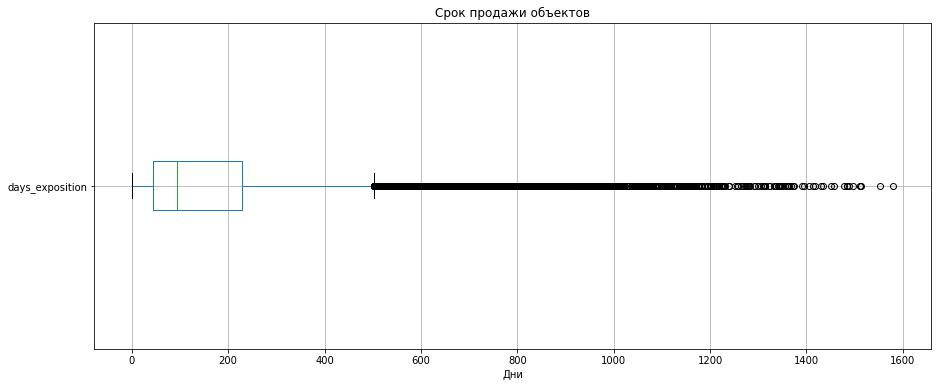

In [76]:
plt.figure(figsize=(15, 6))
df.boxplot('days_exposition', vert=False)
plt.title('Срок продажи объектов')
plt.xlabel('Дни')
plt.show()

Нижний «ус» упирается в минимальное значение. Верхний заканчивается около 500 дней. Это ориентировочная граница нормального размаха. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зеленая линия) не стремится к длинному хвосту высоких значений.
Воспользуемся методами описательной статистики, чтобы получить минимальное и максимальное значения, медиану и среднее.

In [77]:
df['days_exposition'].describe()

count    19806.000000
mean       178.243209
std        216.664051
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи: 178 дней. Это означает, что в среднем недвижимость продается за 178 дней.
Медиана: 94 дня. Медиана показывает, что половина недвижимости продается быстрее, чем за 94 дня, а другая половина — медленнее.
Квартили: 25%-й квартиль равен 45 дням, 75%-й квартиль равен 228 дням. Это означает, что 50% недвижимости продается в диапазоне от 45 до 228 дней.

Определим, какие продажи можно считать быстрыми, а какие — необычно долгими.
Быстрые продажи: можно считать быстрой продажей, если она произошла в пределах 25%-го квартиля, то есть менее 45 дней.
Необычно долгие продажи: необычно долгой можно считать продажу, которая заняла более 75%-го квартиля, то есть более 228 дней.

Выбросы: максимальное значение (1580 дней) может быть выбросом. Также неправдоподобным выглядит минимальное значение (1 день). Однако такие значения мы удалять не будем. Стоит проверить, не было ли в этом случае каких-либо особых обстоятельств (например, уникального объекта недвижимости, сложной сделки).

Таким образом, в большинстве случаев недвижимость продается за 45-228 дней. Продажи, которые завершаются менее чем за 45 дней, можно считать быстрыми, а продажи, которые занимают более 228 дней, — необычно долгими.

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

#####  общая площадь

Построим диаграмму рассеяния для определения взаимосвязи между параметром общая площадь и общей ценой квартиры.

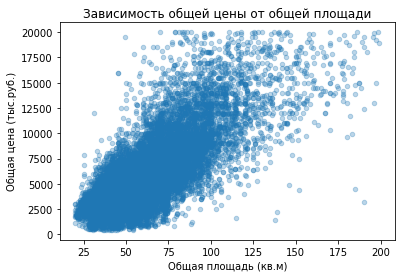

In [78]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от общей площади')
plt.show()

Мы видим прямую линейную зависимость - чем больше площадь, тем выше цена недвижимости. На графике видны отдельные выбивающиеся значения, где большой общей площади соответствует низкая цена. Можно предположить, что такие значения могут быть характерны для ветхих/аварийных квартир, а также квартир в отдаленных населенных пунктах. Также видим выбивающиеся значения, где очень высокая цена и не самая большая площадь. Это могут быть квартиры в престижных районах или уникальные объекты недвижимости.\
Для оценки силы взаимосвязи рассчитаем коэффициент корреляции.

In [79]:
df['last_price'].corr(df['total_area'])

0.7735346930674118

Коффициент корреляции между общей площадью и ценой квартиры составил 0,77. Следовательно, между этими двумя переменными существует сильная положительная корреляция.\
* Положительная корреляция: когда общая площадь жилья увеличивается, цена продажи также, как правило, увеличивается.
* Сильная корреляция: значение корреляции близко к 1, что указывает на тесную взаимосвязь между переменными. 

Вывод:\
Полученная корреляция 0.77 подтверждает, что общая площадь является важным фактором, влияющим на цену продажи недвижимости в рассматриваемом наборе данных.

##### жилая площадь

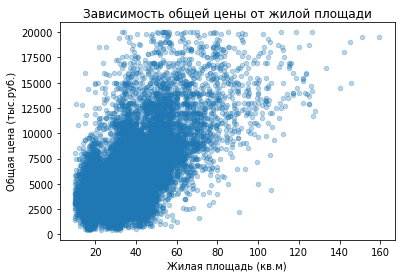

In [80]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от жилой площади')
plt.show()

Мы видим, что есть тенденция к увеличению цены квартиры при увеличении жилой площади. На данном графике выбивающиеся значения встречаются чаще, чем на графике общей площади. Это может быть связано с непропорциональным распределением жилой и общей площади в квартире.

In [81]:
df['last_price'].corr(df['living_area'])

0.6602172966577652

Корреляция между ценой продажи и жилой площадью равна 0.66. Это говорит о том, что между этими двумя переменными существует умеренная положительная корреляция.

* Положительная корреляция: когда жилая площадь увеличивается, цена продажи также, как правило, увеличивается.
* Умеренная корреляция: значение корреляции находится между 0,5 и 0,7, что указывает на среднюю степень взаимосвязи между переменными.  
* Сравнение с общей площадью: корреляция между общей ценой и жилой площадью немного ниже, чем с общей площадью. Это может быть связано с тем, что общая площадь включает в себя не только жилую площадь, но и вспомогательные помещения, балконы, которые тоже могут влиять на цену. 

Вывод:

Полученная корреляция 0.66 подтверждает, что жилая площадь является важным фактором, влияющим на цену продажи недвижимости. Однако ее влияние немного слабее, чем влияние общей площади.

##### площадь кухни

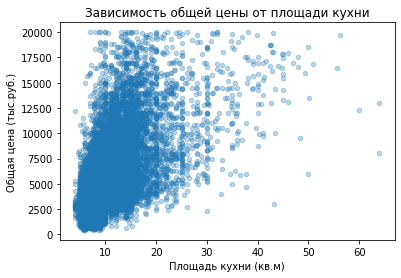

In [82]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от площади кухни')
plt.show()

На данном графике мы видим ещё большее количество выбивающихся значений, чем на двух предыдущих. Как и в случае с жилой площадью, такой характер распределения может быть связан с неравномерным отношением площади кухни к общей площади в квартире. Однако тендеция к увеличению цены при увеличении площади кухни сохраняется.

In [83]:
df['last_price'].corr(df['kitchen_area'])

0.5773634744118339

Корреляция между ценой продажи и площадью кухни равна 0.58. Это означает, что между этими двумя переменными существует умеренная положительная корреляция.

* Положительная корреляция: Когда площадь кухни увеличивается, цена продажи также, как правило, увеличивается.
* Умеренная корреляция: Значение корреляции находится между 0,5 и 0,7, что указывает на среднюю степень взаимосвязи между переменными.
* Причины: Площадь кухни, как правило, влияет на стоимость недвижимости, поскольку она является важной функциональной зоной. Более просторные кухни могут быть более привлекательными для покупателей.
* Сравнение с другими переменными: Корреляция между общей ценой и площадью кухни ниже, чем с общей площадью и жилой площадью. Это может быть связано с тем, что площадь кухни является относительно меньшей частью общей площади и жилой площади.

Вывод:

Полученная корреляция 0.58 подтверждает, что площадь кухни является важным фактором, влияющим на цену продажи недвижимости. Однако ее влияние несколько слабее, чем влияние общей площади и жилой площади

##### количествo комнат

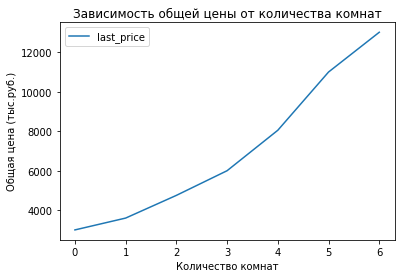

In [84]:
pivot_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median'])
pivot_rooms.plot(y = 'median')

plt.xlabel('Количество комнат')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от количества комнат')
plt.show()

Мы видим выраженную тенденцию - чем больше в квартире комнат, тем выше цена.

Для категориальных признаков коэффициент корреляции Пирсона не показателен. Вывод можно сделать на основании сравнения средних и медианных цен.

In [85]:
df.groupby('rooms')['last_price'].agg(['mean', 'median']).style.format('{:.0f} руб.')

,mean,median
rooms,,
0,3172 руб.,3000 руб.
1,3801 руб.,3600 руб.
2,5332 руб.,4750 руб.
3,6961 руб.,6000 руб.
4,8879 руб.,8050 руб.
5,11235 руб.,11000 руб.
6,13465 руб.,13015 руб.


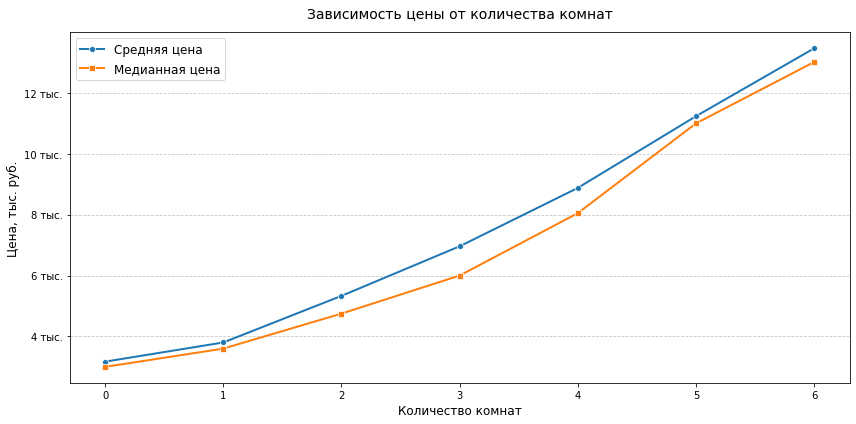

In [86]:
# Рассчитываем статистики
price_stats = df.groupby('rooms')['last_price'].agg(['mean', 'median']).reset_index()

# Строим график
plt.figure(figsize=(12, 6))

# График средних цен
sns.lineplot(data=price_stats, x='rooms', y='mean', 
             marker='o', label='Средняя цена', linewidth=2)

# График медианных цен
sns.lineplot(data=price_stats, x='rooms', y='median', 
             marker='s', label='Медианная цена', linewidth=2)

plt.title('Зависимость цены от количества комнат', fontsize=14, pad=15)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена, тыс. руб.', fontsize=12)
plt.xticks(price_stats['rooms'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Форматирование оси Y в тысячах
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{int(x/1000)} тыс.'))

plt.tight_layout()
plt.show()

Отметим ключевые наблюдения:    
1. Четкая положительная зависимость: цена растет с увеличением числа комнат
2. Разрыв между средним и медианой увеличивается для 5+ комнат → наличие дорогих объектов-выбросов
3. Наибольший скачок цен между 1 и 2 комнатами (+40% по медиане)
4. Для 6+ комнат данных может быть недостаточно для надежных выводов

##### этаж, на котором расположена квартира (первый, последний, другой)

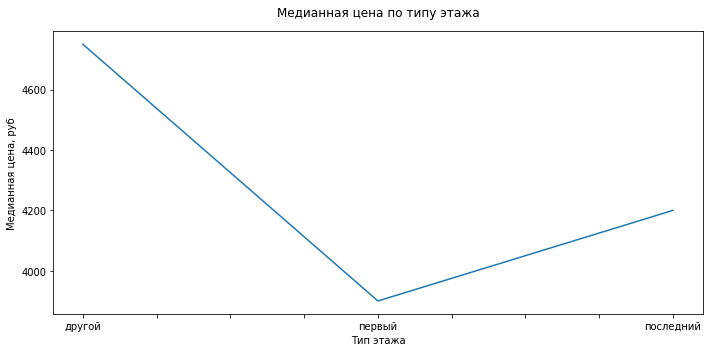

In [87]:
pivot_floor_position = df.pivot_table(index='floor_position', 
                                    values='last_price', 
                                    aggfunc=['median'])

# Построение графика с подписями
ax = pivot_floor_position.plot(y='median', 
                              figsize=(10, 5),
                              legend=False)

# Добавление подписей
ax.set_title('Медианная цена по типу этажа', pad=15)
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Медианная цена, руб')

plt.tight_layout()
plt.show()

На графике мы видим, что квартиры на первых этажах дешевле, чем на последних и на других. При этом на других этажах дороже, чем на последних. 
Мы не можем оценить сиду взаимосвязи с нечислововй переменной, поэтому опишем возможные причины выявленной тенденции:

* Шум: первые этажи могут быть более шумными из-за уличного движения, а последние этажи — из-за шума от крыши, особенно в старых зданиях. 
* Солнечный свет: первые этажи часто получают меньше солнечного света, а последние — больше, что может быть как плюсом, так и минусом в зависимости от предпочтений.
* Вид: последние этажи обычно имеют более красивый вид, но могут страдать от сильного ветра.
* Доступность: первые этажи удобнее для людей с ограниченными возможностями, но могут быть более подвержены проникновению.
* Лифт: в зданиях без лифта, особенно высотных, последние этажи могут быть менее привлекательны из-за необходимости подниматься пешком.
* Техническое состояние: старые здания могут иметь проблемы с кровлей, вентиляцией или водопроводом, что может быть более заметно на последних этажах.

Важно отметить:

* Цена всегда зависит от конкретного объекта: не все квартиры на первых и последних этажах дешевле. Местоположение, состояние, планировка и другие факторы играют важную роль.
* Цены могут отличаться: нены на первые и последние этажи могут быть ниже, чем на других этажах, но не всегда одинаково.

В итоге, квартиры на первых и последних этажах в СПб часто оказываются дешевле, чем на других этажах, из-за комбинации факторов, связанных с удобством, безопасностью, инфраструктурой и психологическими предпочтениями.

##### дата размещения (день недели,)

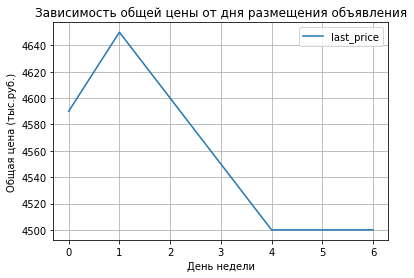

,median
,last_price
weekday,
0,4590.0
1,4650.0
2,4600.0
3,4550.0
4,4500.0
5,4500.0
6,4500.0


In [88]:
pivot_weekday = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['median'])
pivot_weekday.plot(y = 'median', grid=True)
plt.xlabel('День недели')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от дня размещения объявления')
plt.show()
pivot_weekday

In [89]:
df.groupby('weekday')['last_price'].agg(['mean'])

,mean
weekday,
0,5395.389268
1,5478.494724
2,5476.137697
3,5496.095355
4,5359.339517
5,5244.796940
6,5230.759842


Мы видим, что самая у объявлений, опубликованных в конце недели - пятницу, субботу и воскресенье цена ниже, чем у объявлений, опубликованных в будние дни.
Однако медианная цена продажи недвижимости в зависимости от дня недели практически не меняется. Она колеблется в пределах 4500-4650, показывая, что день недели не оказывает существенного влияния на медианную цену сделки. 

##### дата размещения (месяц)

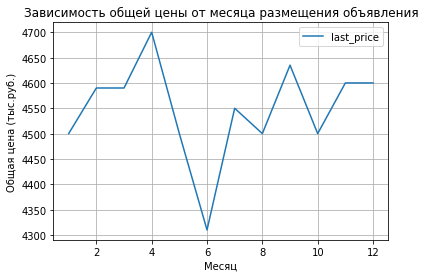

In [90]:
pivot_month = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
pivot_month.plot(y = 'median', grid=True)
plt.xlabel('Месяц')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от месяца размещения объявления')
plt.show()

Медианная цена продажи недвижимости колеблется в течение года, но не демонстрирует четкой зависимости от месяца. 
Можно отметить пик с высокой ценой в апреле и пик с самой низкой ценой в июне.

##### дата размещения (год)

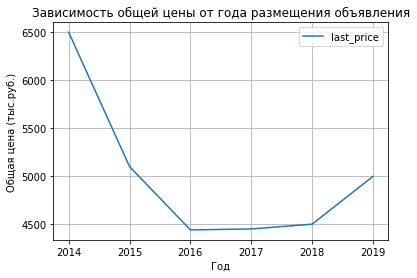

,median
,last_price
year,
2014,6500.0
2015,5100.0
2016,4440.0
2017,4450.0
2018,4500.0
2019,4998.5


In [91]:
pivot_year = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
pivot_year.plot(y = 'median', grid=True)
plt.xlabel('Год')
plt.ylabel('Общая цена (тыс.руб.)')
plt.title('Зависимость общей цены от года размещения объявления')
plt.show()
pivot_year

Медианная цена продажи недвижимости демонстрирует тенденцию к снижению с 2014 по 2017 год, после чего наблюдается небольшое повышение. 

#### Анализ населённых пунктов с самой высокой и низкой стоимостью квадратного метра.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [92]:
locality_pivot = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean']
locality_pivot = locality_pivot.sort_values('count', ascending = False).head(10)
locality_pivot

,count,mean
locality_name,,
Санкт-Петербург,14883,108.654208
Мурино,580,85.829090
Кудрово,459,95.299967
Шушары,437,78.554929
Всеволожск,396,67.275629
Пушкин,358,101.818047
Колпино,337,75.333288
Парголово,323,90.348972
Гатчина,307,68.746111


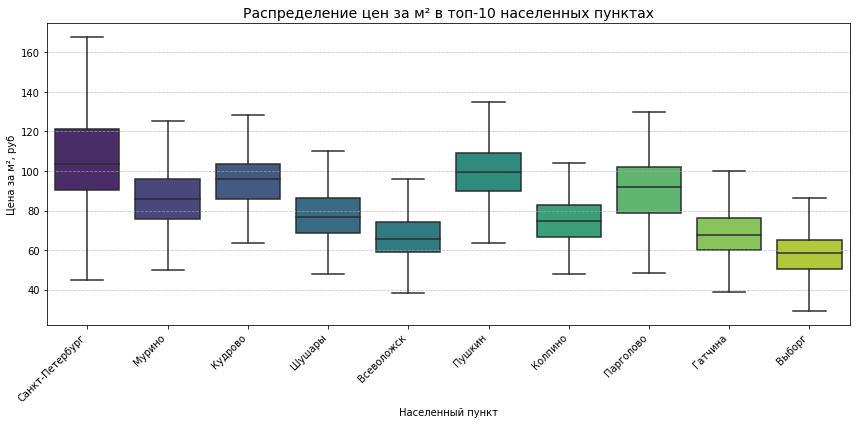

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='locality_name', y='price_per_square_meter', 
            data=df[df['locality_name'].isin(locality_pivot.index)],
            order=locality_pivot.index,
            palette='viridis',
            showfliers=False)  # Скрываем выбросы для лучшей читаемости
plt.title('Распределение цен за м² в топ-10 населенных пунктах', fontsize=14)
plt.xlabel('Населенный пункт')
plt.ylabel('Цена за м², руб')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
#самая низкая стоимость
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].min()]

,count,mean
locality_name,,
Выборг,235,58.238153


In [95]:
#самая высокая стоимость
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14883,108.654208


Анализ цен на квадратный метр в 10 населённых пунктах с наибольшим числом объявлений показал следующие результаты:

Самая высокая стоимость квадратного метра:

* Санкт-Петербург: 108.65 тыс.руб./м²

Самая низкая стоимость квадратного метра:

* Выборг: 58.24 тыс.руб./м²

* Санкт-Петербург, несмотря на высокую стоимость жилья, является лидером по количеству объявлений, что свидетельствует о его популярности среди покупателей.
* Мурино и Кудрово, расположенные в Ленинградской области, демонстрируют более высокую стоимость квадратного метра по сравнению с другими городами региона. Это может быть связано с их близостью к Санкт-Петербургу и развитой инфраструктурой.
* Пушкин, известный своей историей и парками, также демонстрирует высокую стоимость жилья. 
* Населенные пункты с более низкой стоимостью квадратного метра, такие как Гатчина, Колпино, Всеволожск и Выборг, могут быть привлекательными для покупателей с ограниченным бюджетом.

#### Зависимость стоимости объектов от расстояния до центра города

Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра.

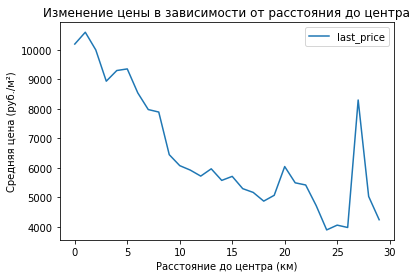

In [96]:
df['center_distance_km'] = df['center_distance_km'].fillna(999999) #заменим пропуски на 999999
df['center_distance_km'] = df['center_distance_km'].astype('int') #преобразуем в целые числа, округление вниз
(
    df.query('locality_name == "Санкт-Петербург" and center_distance_km !=999999')
    .pivot_table(index='center_distance_km', values='last_price', aggfunc='mean')
    .plot()
   )

plt.xlabel("Расстояние до центра (км)")
plt.ylabel("Средняя цена (руб./м²)")
plt.title("Изменение цены в зависимости от расстояния до центра")
plt.show()


In [97]:
(
    df.query('locality_name == "Санкт-Петербург" and center_distance_km !=999999')
    .pivot_table(index='center_distance_km', values='last_price', aggfunc='mean')
    
   )

,last_price
center_distance_km,
0,10198.571429
1,10599.868414
2,9999.724000
3,8938.367298
4,9300.308090
5,9355.369810
6,8542.631966
7,7975.810625
8,7891.201329


На графике видно, что цена квартир в Санкт-Петербурге имеет тенденцию к снижению с увеличением расстояния от центра города. 

* В первые 5-6 км наблюдается относительно стабильная цена, которая затем начинает заметно падать.
* После 10 км происходит резкое снижение, и цена продолжает постепенно снижаться до 25 км. 
* После 25 км наблюдается некоторое повышение цены, что может быть связано с меньшим количеством данных для расчета средней цены или с наличием уникальных объектов загородной недвижимости.

### Итоги исследования

Мы провели исследование объявлений о продаже квартир по данным сервиса Яндекс Недвижимость — архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Результаты предобработки:**

**1. Анализ пропущенных значений:**

| Столбец | % пропусков | Обработка | Комментарий |
|---|---|---|---|
| Данные заполняет пользователь|
| 'ceiling_height' | 39% | Замена медианой | Данных недостаточно. К выводам нужно относиться с осторожностью. |
| 'floors_total' | 0,4% | Без изменений | | 
| 'living_area' | 8% | Без изменений | | 
| 'kitchen_area' | 10% | Без изменений | | 
| 'is_apartment' | 88% | Без изменений | Данных недостаточно для анализа. |
| 'balcony' | 49% | Замена на 0 | Данных недостаточно для анализа. |
| 'locality_name' | 0,2% | Замена на "unknown" | |
| 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' | 23% | Без изменений | |
| Данные заполняются без участия пользователя|
| 'parks_nearest' | 65% | Без изменений |  Данных недостаточно для анализа. |
| 'ponds_nearest' | 62% | Без изменений | Данных недостаточно для анализа. |
| 'days_exposition' | 13% | Без изменений | |

**2. Изменение типов данных:**

* 'first_day_exposition' - изменен на datetime
* 'balcony' - изменен на int
* 'is_apartment' - изменен на bool

**3. Обработка дубликатов:**

* В исходном датафрейме дубликатов не обнаружено. 
* В столбце 'locality_name' были найдены и обработаны неявные дубликаты.

**4. Обработка выбросов:**

* **Площадь:**
    * Удалены квартиры с общей площадью менее 20 кв.м. (менее 0,12%).
    * Удалены квартиры с общей площадью более 200 кв.м. (около 1%).
    * Удалены квартиры с жилой площадью менее 10 кв.м. (0,1%).
    * Удалены квартиры с площадью кухни менее 4 кв.м. (0,1%).
* **Цена:**
    * Удалены квартиры стоимостью менее 2 млн.руб, площадь которых более 50 кв.м. и они находятся в СПб (менее 0,01%).
    * Удалены квартиры стоимостью более 20 млн руб. (менее 0,22%).
* **Высота потолков:**
    * Все значения высоты потолков более 10 м были разделены на 10, предположив, что авторы объявлений могли ошибиться при вводе.
    * К этим выводам надо относиться с осторожностью, так как было много пропущенных значений, которые были заполнены медианой.
* **Количество комнат:**
    * Удалены квартиры со значением 0 комнат, которые не являются студиями (0,02%).
    * Удалены квартиры, в которых 6 комнат и выше (0,07%).

**5. Анализ влияющих факторов:**

**Основные факторы, влияющие на общую стоимость объекта:**

* **Общая площадь:** Корреляция между ценой продажи и общей площадью 0.77 подтверждает, что общая площадь является важным фактором, влияющим на цену продажи недвижимости.
* **Жилая площадь:** Корреляция 0.66 подтверждает, что жилая площадь является важным фактором, влияющим на цену продажи недвижимости. Однако ее влияние немного слабее, чем влияние общей площади.
* **Площадь кухни:** Корреляция 0.58 подтверждает, что площадь кухни является важным фактором, влияющим на цену продажи недвижимости. Однако ее влияние несколько слабее, чем влияние общей площади и жилой площади.
* **Количество комнат:** Корреляция 0.5 подтверждает, что количество комнат влияет на цену продажи недвижимости. Количество комнат положительно влияет на цену недвижимости, но эта связь не является очень сильной. 

**Дополнительные факторы:**

* **Тип этажа:** Квартиры на первых и последних этажах в СПб часто оказываются дешевле, чем на других этажах, из-за комбинации факторов, связанных с удобством, безопасностью, инфраструктурой и психологическими предпочтениями. 
* **Даты размещения (день недели, месяц, год):**
    * **День недели:** Очень слабая связь: коэффициент -0,018 указывает на то, что связь практически отсутствует. Это означает, что день недели практически не влияет на цену продажи недвижимости.
    * **Месяц:** Коэффициент корреляции 0,0069 подтверждает, что связь между месяцем и ценой продажи практически отсутствует. 
    * **Год:** Наблюдается отрицательная корреляция (-0,27) между медианной ценой продажи и годом, что свидетельствует о слабой обратной зависимости. В период с 2014 по 2018 год наблюдалась тенденция к снижению медианной цены продажи недвижимости, после чего произошло небольшое повышение. На это мог оказать влияние валютный кризис в России (2014—2015).

**6. Анализ цен на квадратный метр в 10 населённых пунктах с наибольшим числом объявлений:**

* **Самая высокая стоимость квадратного метра:** Санкт-Петербург: 108.65 тыс.руб./м²
* **Самая низкая стоимость квадратного метра:** Выборг: 58.24 тыс.руб./м²

**7. Анализ зависимости цены от расстояния до центра (для квартир из Петербурга):**

На графике видно, что цена квартир в Санкт-Петербурге имеет тенденцию к снижению с увеличением расстояния от центра города.








